In [101]:
import pandas as pd
import sys, os, pathlib
sys.path.append(str(pathlib.Path(os.getcwd()).parent))
sys.path
from src.utils.projekt_utils import get_project_root
from src.utils.name_utils import US_STATES_DIR
FIPS = 'FIPS code'


In [102]:
df1 = pd.read_csv(os.path.join(get_project_root(), "data/processed/education_data.csv"), sep=';')

In [158]:
 # education 
edu =  df1.iloc[:,-2:].sum(axis=1).to_frame(name="Higher Education")
edu[FIPS] = df1[FIPS]
edu = edu.set_index(FIPS)

In [159]:
edu

,Higher Education
FIPS code,
1001,56.825870
1003,63.638665
1005,38.994165
1007,36.619543
1009,48.524639
...,...
56037,60.102100
56039,79.132454
56041,57.145016


In [160]:
df2 = pd.read_csv(os.path.join(get_project_root(), "data/processed/GDP_data.csv"), sep=';')


In [161]:
gdp = df2[[FIPS,'2016 Real GDP (thousands of chained 2012 dollars) ']]
gdp = gdp.set_index(FIPS)

In [162]:
df3 = pd.read_csv(os.path.join(get_project_root(), "data/processed/HPI_data.csv"), sep=';')

In [163]:
hpi = df3[[FIPS, '2016 HPI Change']]
hpi = hpi.set_index(FIPS)

In [164]:
df4 = pd.read_csv(os.path.join(get_project_root(), "data/processed/income_data.csv"), sep=';')

In [165]:
income = df4[[FIPS, '2016 Population (persons) 1/']]
income = income.set_index(FIPS)

In [166]:
df5 = pd.read_csv(os.path.join(get_project_root(), "data/processed/unemployment_data.csv"), sep=';')

In [167]:
unempl = df5[[FIPS, 'Unemployment_rate_2016']]
unempl = unempl.set_index(FIPS)

In [168]:
df6 = pd.read_csv(os.path.join(get_project_root(), "data/processed/health_data.csv"), sep=';')

In [169]:
df6_cols = [FIPS, 'Poor physical health days raw value 2016', 'Poor mental health days raw value 2016', 'Violent crime raw value 2016', 'Severe housing problems raw value 2016', 'Income inequality raw value 2016', 'Access to exercise opportunities raw value 2016']
health = df6[df6_cols]
health = health.set_index(FIPS)

In [170]:
import re
core_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/MigrationData.csv'), encoding='latin-1',
                            sep=';',skipinitialspace = True)

names = ['StateA', 'CountyA','StateB', 'CountyB']
for name in names:
    core_data[name] = core_data[name].map(str.strip)
    
us_data = core_data[core_data['StateA'].isin(US_STATES_DIR.values()) & core_data['StateB'].isin(US_STATES_DIR.values())]

fipsA = us_data['index'].map(lambda x : re.compile(r'[1-9][0-9]{3}[1-9]?').search(x[1:7]))
fipsA = fipsA.dropna().map(lambda x: int(x.group(0)))

In [171]:
fipsA

0          1001
1          1001
2          1001
3          1001
4          1001
          ...  
411710    56045
411711    56045
411712    56045
411713    56045
411714    56045
Name: index, Length: 398252, dtype: int64

In [172]:
common_fips = set(df1['FIPS code']) & set(df2['FIPS code']) & set(df3['FIPS code']) & set(df4['FIPS code']) & set(df5['FIPS code']) & set(df6['FIPS code']) & set(fipsA)


In [173]:
len(common_fips)


2703

In [179]:
df = edu.join(gdp, how='inner').join(hpi, how='inner').join(income,how='inner' ).join(unempl, how='inner').join(health, how='inner')

In [180]:
df

,Higher Education,2016 Real GDP (thousands of chained 2012 dollars),2016 HPI Change,2016 Population (persons) 1/,Unemployment_rate_2016,Poor physical health days raw value 2016,Poor mental health days raw value 2016,Violent crime raw value 2016,Severe housing problems raw value 2016,Income inequality raw value 2016,Access to exercise opportunities raw value 2016
FIPS code,,,,,,,,,,,
1001.0,56.825870,1652177.0,2.64,56954,5.1,4.4,4.3,253.644617,0.136193,4.303481,0.708215
1003.0,63.638665,6266434.0,5.20,210004,5.4,4.1,4.2,220.665106,0.147079,4.494800,0.721685
1005.0,38.994165,727850.0,-0.68,26217,8.4,4.9,4.7,146.888576,0.175597,5.285567,0.452671
1007.0,36.619543,348377.0,3.95,22654,6.5,4.8,4.6,235.952110,0.129993,4.251361,0.328388
1009.0,48.524639,865373.0,1.66,58238,5.4,4.6,4.5,219.034344,0.123395,4.124186,0.255085
...,...,...,...,...,...,...,...,...,...,...,...
56037.0,60.102100,3819789.0,0.64,43979,6.1,3.4,3.2,429.278285,0.095555,4.043361,0.905858
56039.0,79.132454,2113714.0,11.04,23157,3.5,3.0,3.0,299.352183,0.198635,3.812541,0.978351
56041.0,57.145016,959716.0,5.64,20846,5.8,3.4,3.2,45.362551,0.124828,4.693743,0.145800


In [176]:
gdp.shape

(3072, 1)

<Axes: >

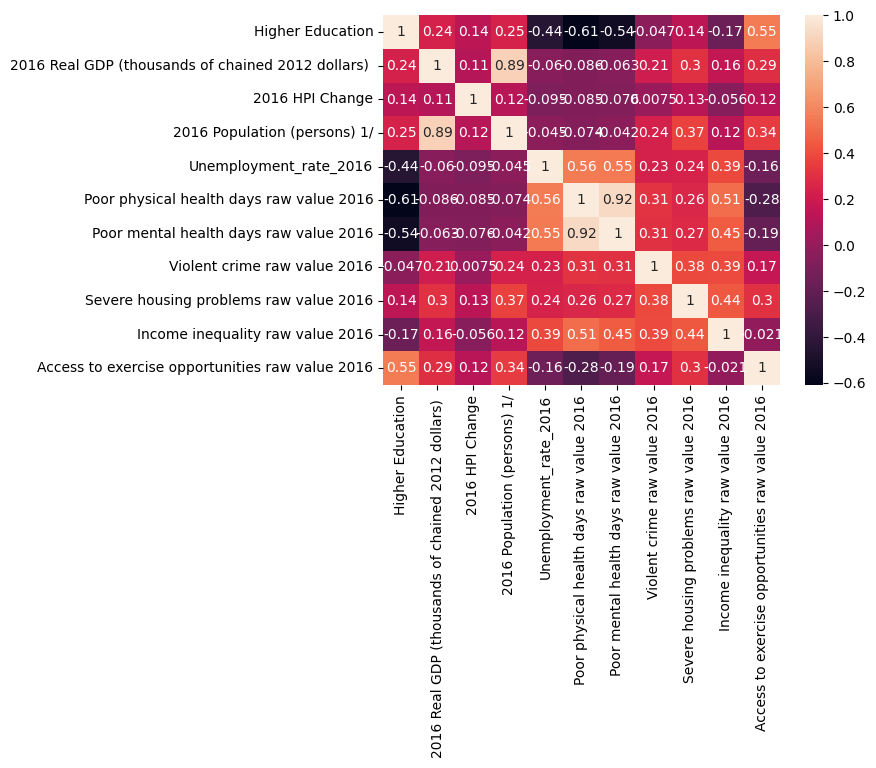

In [185]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)